In [88]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
#load data superstore
df = pd.read_csv('superstore.csv')
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
#ekstraksi kolom order date menjadi year_order dan month_order
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])
df['year_order'] = df['ship_date'].dt.year
df['month_order']=df['ship_date'].dt.month
df['month_order']= df['month_order'].astype(str)
mapping_month = {'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August',
                 '9':'September','10':'October','11':'November','12':'December'}
df['month_order'] = df['month_order'].replace(mapping_month)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  subcategory    9994 n

In [11]:
#cek data null
df.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
subcategory      0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

In [12]:
df.describe()

,row_id,postal_code,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [28]:
#ambil data hanya sampai tahun 2017 karena pada tahun 2018 data masih kurang lengkap
df = df[df['year_order']<2018]
df['year_order'].unique()

array([2016, 2015, 2014, 2017], dtype=int64)

# Orders Analysist by Category

In [261]:
#membuat pivot tabel untuk melihat tiap kategori yagn ada.
top_category = pd.pivot_table(df, index=['category'],
                       aggfunc={
                           'sales' : 'mean',
                           'discount':'mean',
                           'quantity' : 'sum',
                           'profit' : 'sum'
                       }).reset_index()

top_category

,category,discount,profit,quantity,sales
0,Furniture,0.173860,17962.1292,7987,350.467230
1,Office Supplies,0.157126,122074.5706,22809,119.546574
2,Technology,0.132430,145425.5325,6926,453.224445


<AxesSubplot:xlabel='category', ylabel='sales'>

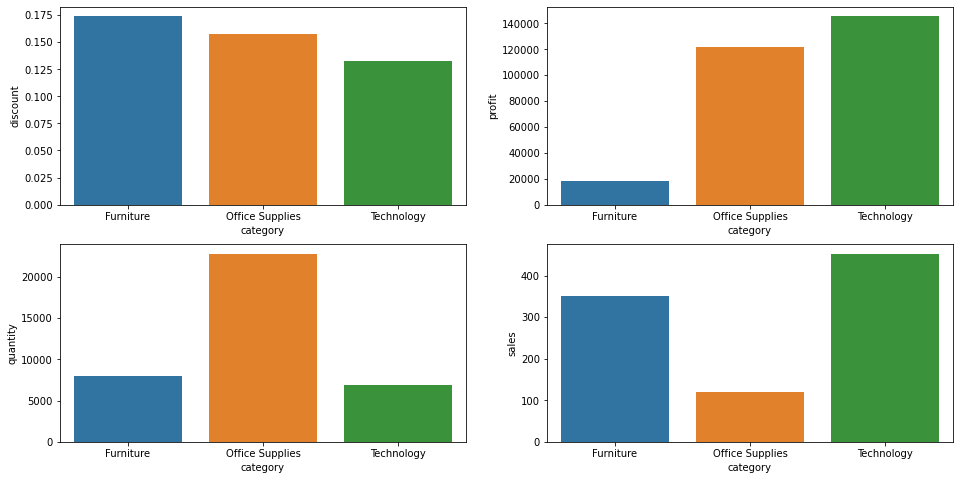

In [62]:
#visualisasi pivot tabel kategori
_,axes=plt.subplots(nrows=2,ncols=2,figsize=(16,8))
sns.barplot(x='category',y='discount',data=top_category,ax=axes[0,0])
sns.barplot(x='category',y='profit',data=top_category,ax=axes[0,1])
sns.barplot(x='category',y='quantity',data=top_category,ax=axes[1,0])
sns.barplot(x='category',y='sales',data=top_category,ax=axes[1,1])

#### Penjualan dengan kategori teknologi memiliki profit yang paling besar dibandingkan dengan kategori lain.Tetapi jika dilihat dari jumlah barang yang dijual (quantity)pada kategori teknologi memiliki nilai yang lebih kecil. Hal ini mengindikasikan bahwa harga jual/keuntungan yang diambil per barang dengan kategori teknologi lebih tinggi dibanding yang lain.

#### Jika dicermati lagi barang dengan kategori furniture memili profit yang paling kecil dan perbedaanya sangat signifikan dengan kategori lain. Penjualan dengan kategori furniture memiliki jumlah pembelian paling sedikit padahal kategori furniture sudah memberikan rata-rata diskon paling tinggi dibanding kategori yang lain. Hal ini kemungkinan besar terjadi dikarenakan rata-rata sales kategori furniture terbilang cukup tinggi sehingga perlu ada penyesuaian harga barang kategori furniture.

# Sales vs Profit Analyst

In [262]:
#membuat pivot tabel untuk melihat profit dan sales tiap tahunnya.
pv1 = pd.pivot_table(df, index=['year_order'],
                       aggfunc={
                           'sales' : 'sum',
                           'discount':'mean',
                           'quantity' : 'sum',
                           'profit' : 'sum'
                       }).reset_index()
pv1['Kenaikan Profit (%)'] = (pv1['profit'].diff()/pv1['profit'].shift())*100
pv1['Kenaikan Discount (%)'] = (pv1['discount'].diff()/pv1['discount'].shift())*100
pv1

,year_order,discount,profit,quantity,sales,Kenaikan Profit (%),Kenaikan Discount (%)
0,2014,0.159052,47292.7255,7365,470383.1931,NaN,NaN
1,2015,0.155321,62881.5299,8109,479442.5020,32.962373,-2.345215
2,2016,0.153693,82941.1017,9823,611325.7530,31.900578,-1.048574
3,2017,0.156736,92346.8752,12425,730889.7154,11.340305,1.980259


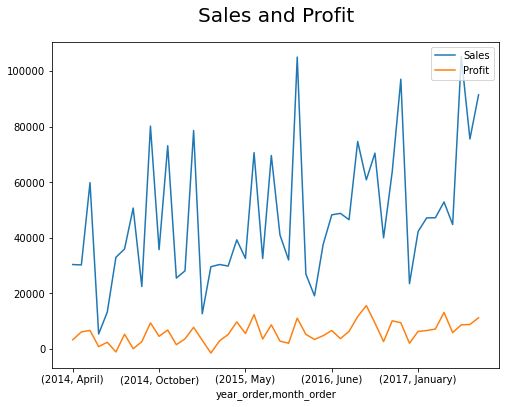

In [71]:
#visualisasi
plt.figure(figsize=(8,6))
df.groupby(['year_order','month_order'])['sales'].sum().plot()
df.groupby(['year_order','month_order'])['profit'].sum().plot()
plt.title("Sales and Profit", size=20, pad=20)
plt.legend(["Sales", "Profit"], loc ="upper right")
plt.show()

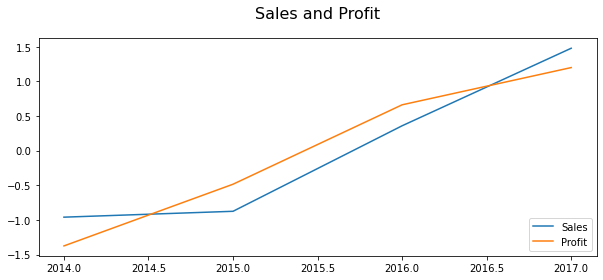

In [93]:
sales_trend=df.groupby('year_order').sum().sort_values('year_order')
scaler=StandardScaler()
sales_trend.sales=scaler.fit_transform(sales_trend[['sales']])
sales_trend.profit=scaler.fit_transform(sales_trend[['profit']])

plt.figure(figsize=[10,4])
plt.plot(sales_trend.index, 'sales', data=sales_trend) 
plt.plot(sales_trend.index, 'profit', data=sales_trend)
plt.title("Sales and Profit", size=16, pad=20)
plt.legend(["Sales", "Profit"], loc ="lower right")
plt.show()

# Customers Segmentation

In [94]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,category,subcategory,product_name,sales,quantity,discount,profit,day_order,year_order,month_order
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,16,2016,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,18,2015,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,18,2015,October


In [228]:
#membuat pivot tabel untuk melihat seberapa banyak tiap customer melakukan pembelian
curr_year = pd.datetime(2018,1,1)
customer_seg = pd.pivot_table(data=df, index=['customer_id'],
                             aggfunc ={
                                 'order_id' : 'count',
                                 'order_date' : lambda x: (curr_year-x.max()).days,
                                 'sales' : 'sum'
                             }).reset_index()
customer_seg = customer_seg.rename(columns={'order_id':'Frequency','order_date':'Last_Order (days)','sales':'spending_money'})
customer_seg

<ipython-input-228-dcfb2fa3463b>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  curr_year = pd.datetime(2018,1,1)


,customer_id,Last_Order (days),Frequency,spending_money
0,AA-10315,186,11,5563.560
1,AA-10375,21,15,1056.390
2,AA-10480,261,12,1790.512
3,AA-10645,57,18,5086.935
4,AB-10015,417,6,886.156
...,...,...,...,...
788,XP-21865,45,28,2374.658
789,YC-21895,6,8,5454.350
790,YS-21880,11,12,6720.444
791,ZC-21910,56,31,8025.707


In [229]:
# transform data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster = customer_seg.drop(['customer_id'], axis=1)
cluster = scaler.fit_transform(cluster)
cluster = pd.DataFrame(cluster,columns = ['Last_Order ','Frequency','spending_money'])
cluster

,Last_Order,Frequency,spending_money
0,0.178483,-0.248324,1.017820
1,-0.703085,0.392590,-0.698272
2,0.579196,-0.088095,-0.418757
3,-0.510743,0.873276,0.836346
4,1.412679,-1.049466,-0.763088
...,...,...,...
788,-0.574857,2.475560,-0.196345
789,-0.783228,-0.729009,0.976238
790,-0.756514,-0.088095,1.458300
791,-0.516086,2.956246,1.955275


In [230]:
# membuat model untuk membuat cluster segmentasi customer menggunakan kmeans clustering
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(cluster)

# Get the cluster labels for each data point
labels = kmeans.labels_
customer_seg['Customers_Segmentation'] = labels # append labels to points

In [231]:
pv3 = pd.pivot_table(data=customer_seg, index='Customers_Segmentation',
                    aggfunc={
                        'Frequency':'mean'
                    }).reset_index()
pv3.sort_values('Frequency')

,Customers_Segmentation,Frequency
1,1,7.575000
0,0,10.661053
2,2,20.095960


In [232]:
map={2:'Loyal Customers',0:'Potential Customers',1:'Special Needs Customers'}
customer_seg['Customers_Segmentation'] = customer_seg['Customers_Segmentation'].replace(map)
customer_seg['Customers_Segmentation'].value_counts()

Potential Customers        475
Loyal Customers            198
Special Needs Customers    120
Name: Customers_Segmentation, dtype: int64

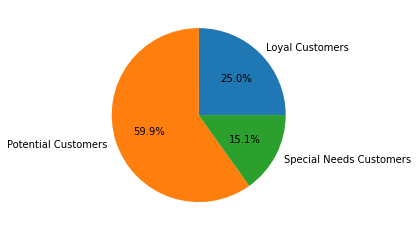

In [234]:
#visualisasi presentase segmentasi customer
pv2 = pd.pivot_table(data=customer_seg, index=['Customers_Segmentation'],
                   aggfunc={
                       'customer_id':'count'
                   }).reset_index()
pv2 = pv2.rename(columns={'customer_id':'Jumlah'})
plt.pie(data = pv2,x='Jumlah', labels='Customers_Segmentation', autopct='%1.1f%%')
plt.show()

#### Deskripsi :
     1. Loyal Customers = Customer yang sudah sangat sering melakukan pembelian.
     2. Potential Customers = Customer belum terlalu sering melakukan pembelian tetapi customer ini sangat berpotensi
     menjadi loya customer.
     3. Special needs = Customers dengan frekuensi pembelian terendah sehingga customer tipe ini harus mendapat perlakuan 
     khusus agar bisa menjadi lebih sering malakukan pembelian. 

### Sebagian besar customer berada pada segment potential customer dengan presentase sebanyak 59.9%. Sehingga segmen ini harus diberikan perlakukan extra agar levelnya bisa naik dan tidak menghilang.

### Walaupun segmen special needs customer memiliki presentase customer paling sedikit, tetapi segmen ini juga perlu diberikan perhatian khusus sehingga customer pada segmen ini tidak menghilang dan diharapkan bisa naik menjadi potential customer

In [252]:
x  = customer_seg[['customer_id','Customers_Segmentation']]
df = pd.merge(df,x, on ='customer_id', how='left')
pv_seg = pd.pivot_table(data=df, index=['Customers_Segmentation','category'],
                       aggfunc={
                           'discount' :'mean',
                           'quantity' :'sum'
                       }).reset_index()
pv_seg

,Customers_Segmentation,category,discount,quantity
0,Loyal Customers,Furniture,0.169079,3340
1,Loyal Customers,Office Supplies,0.155115,8972
2,Loyal Customers,Technology,0.139059,3011
3,Potential Customers,Furniture,0.176268,3905
4,Potential Customers,Office Supplies,0.159548,11666
5,Potential Customers,Technology,0.125444,3380
6,Special Needs Customers,Furniture,0.181503,742
7,Special Needs Customers,Office Supplies,0.152151,2171
8,Special Needs Customers,Technology,0.139241,535


<AxesSubplot:xlabel='Customers_Segmentation', ylabel='quantity'>

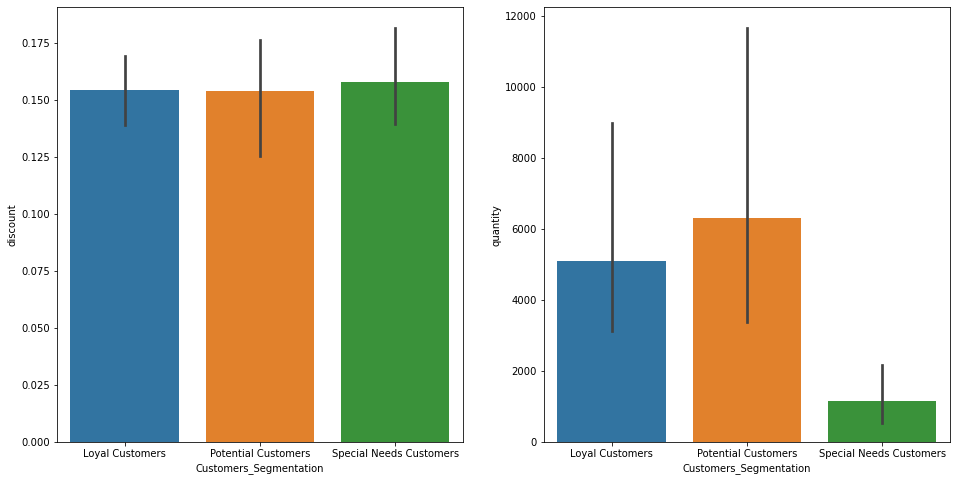

In [253]:
#visualisasi rata-rata discount yang diberikan kepada tiap segmen customer dan jumlah barang yang dibeli tiap segmen customer 
_,axes=plt.subplots(nrows=1,ncols=2,figsize=(16,8))
sns.barplot(x='Customers_Segmentation',y='discount',data=pv_seg,ax=axes[0])
sns.barplot(x='Customers_Segmentation',y='quantity',data=pv_seg,ax=axes[1])

### Dapat dilihat bahwa diskon yang diberikan pada tiap customer sudah hampir merata. Sementara jika dilihat dari jumlah barang yang dibeli , special needs memiliki nilai yang cukup rendah.

<AxesSubplot:xlabel='year_order', ylabel='discount'>

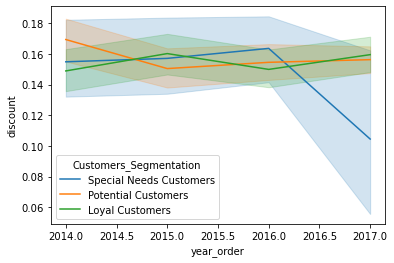

In [251]:
### visualisasi diskon yang tiap tahunya pada tiap segmen customer
sns.lineplot(data=df, x ='year_order', y ='discount', hue='Customers_Segmentation')

### Nilai diskon yang diberikan kepada special needs customer menurun drastis dari tahun 2016 ke tahun 2017. Hal ini mungkin yang membuat jumlah pembelian special needs customer juga sangat rendah.

<AxesSubplot:xlabel='Customers_Segmentation', ylabel='discount'>

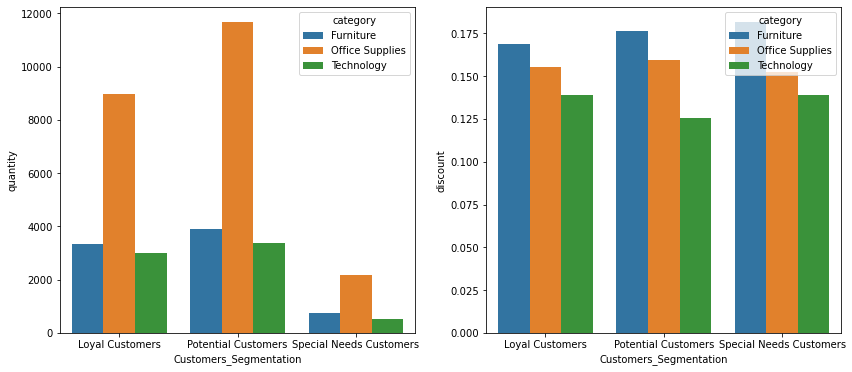

In [260]:
#visualisasi kategori produk yang dibeli oleh tiap segmen customer 
_,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.barplot(data=pv_seg, x='Customers_Segmentation', y ='quantity', hue='category',ax=axes[0])
sns.barplot(data=pv_seg, x='Customers_Segmentation', y ='discount', hue='category',ax=axes[1])

### Dapat dilihat bahwa kategori office suplier merupakan kategori barang yagn paling banyak dibeli oleh semua segmen. Untuk dapat lebih meningkatkan penjualan disarankan untuk meningkatkan diskon pada kategori ini.
### sementara untuk segmen special needs customer sudah diberikan rata-rata diskon yang paling tinggi untuk tiap kategori barangnya, tetapi hal ini berbanding terbalik dengan jumlah pembelian yang dilakukan oleh special needs customer. Maka dari itu diperlukan lebih lagi pemasaran dan promo-promo yang targetnya adalah special needs customer.

### Kesimpulan :
       1. Tren profit penjualan dari tiap tahun ke tahun selalu naik dengna kenaikan profit terakhir sebesar 11%.
       2. Kategori barang yang paling banyak memberikan keuntungan merupakan kategori teknologi sementara kategori barang yang
       paling banyak dibeli adalah kategori office supliers.
       3. Dari keseluruhan customer, Sebagian besar customer berada pada segment potential customer dengan presentase sebanyak 
       59.9%. Sehingga ada beberapa perlakuan khusus yang harus dilakukan untuk segmen ini seperti memberikan diskon yag lebih
       tinggi untuk pembelian barang dengan kategori teknologi. 
       4. Sementara untuk segmen special needs customer perlakuan khusus yang bisa dilakukan untuk mepertahankan customer 
       adalah dengan melakukan pemasaran dan promo-promo yang targetnya adalah langsung special needs customer.